In [1]:
import numpy as np
import pandas as pd
import keras
import altair as alt

from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
df = pd.read_csv('data/weight.csv', usecols=[ 1, 3 ]).rename(columns = { 'weight.@value' : 'weight' }).dropna()
df.head()

,percentage,weight
0,13.096,73.00
1,12.846,71.80
2,13.669,71.45
3,12.693,71.00
4,13.438,71.45


In [3]:
X_scaler = preprocessing.MinMaxScaler()
Y_scaler = preprocessing.MinMaxScaler()

df['weight_scaled'] = X_scaler.fit_transform(df[['weight']])
df['percentage_scaled'] = Y_scaler.fit_transform(df[['percentage']])
df.head()

,percentage,weight,weight_scaled,percentage_scaled
0,13.096,73.00,0.461538,0.480678
1,12.846,71.80,0.319527,0.439915
2,13.669,71.45,0.278107,0.574107
3,12.693,71.00,0.224852,0.414968
4,13.438,71.45,0.278107,0.536442


In [4]:
model = Sequential()
model.add(Dense(input_dim = 1, kernel_initializer = "normal", activation = "linear", units = 1))
model.compile(loss = "mean_squared_error", optimizer = "rmsprop")
model.fit(df['weight_scaled'], df['percentage_scaled'], epochs = 50, batch_size = 64, validation_split = 0.2, verbose = True)

Train on 1491 samples, validate on 373 samples
Epoch 1/50
1491/1491 [==============================] - 0s 88us/step - loss: 0.1736 - val_loss: 0.4195
Epoch 2/50
1491/1491 [==============================] - 0s 16us/step - loss: 0.1457 - val_loss: 0.3695
Epoch 3/50
1491/1491 [==============================] - 0s 21us/step - loss: 0.1227 - val_loss: 0.3236
Epoch 4/50
1491/1491 [==============================] - 0s 19us/step - loss: 0.1021 - val_loss: 0.2813
Epoch 5/50
1491/1491 [==============================] - 0s 19us/step - loss: 0.0840 - val_loss: 0.2420
Epoch 6/50
1491/1491 [==============================] - 0s 18us/step - loss: 0.0679 - val_loss: 0.2060
Epoch 7/50
1491/1491 [==============================] - 0s 19us/step - loss: 0.0542 - val_loss: 0.1744
Epoch 8/50
1491/1491 [==============================] - 0s 19us/step - loss: 0.0427 - val_loss: 0.1443
Epoch 9/50
1491/1491 [==============================] - 0s 17us/step - loss: 0.0332 - val_loss: 0.1184
Epoch 10/50
1491/1491 [===

In [5]:
(slope, intercept) = [weight[0].flatten()[0] for weight in model.get_weights()]
df['percentage_tf'] = Y_scaler.inverse_transform(X_scaler.transform([df.weight]) * slope + intercept)[0]
df.head()

,percentage,weight,weight_scaled,percentage_scaled,percentage_tf
0,13.096,73.00,0.461538,0.480678,13.072135
1,12.846,71.80,0.319527,0.439915,12.356209
2,13.669,71.45,0.278107,0.574107,12.147397
3,12.693,71.00,0.224852,0.414968,11.878925
4,13.438,71.45,0.278107,0.536442,12.147397


In [6]:
(slope, intercept) = np.polyfit(df.weight.values, df.percentage.values, 1)
df['percentage_np'] = df.weight * slope + intercept
df.head()

,percentage,weight,weight_scaled,percentage_scaled,percentage_tf,percentage_np
0,13.096,73.00,0.461538,0.480678,13.072135,13.143897
1,12.846,71.80,0.319527,0.439915,12.356209,12.370352
2,13.669,71.45,0.278107,0.574107,12.147397,12.144735
3,12.693,71.00,0.224852,0.414968,11.878925,11.854656
4,13.438,71.45,0.278107,0.536442,12.147397,12.144735


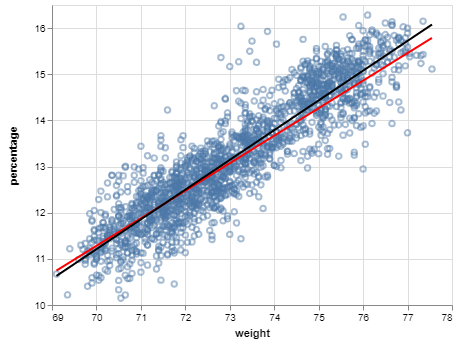

In [7]:
chart = alt.Chart(df).encode(alt.X('weight', scale = alt.Scale(zero = False)), alt.Y('bar'))
alt.layer(
    chart.mark_point(opacity = 0.5).encode(alt.Y('percentage', scale = alt.Scale(zero = False), axis=alt.Axis(title = 'percentage'))),
    chart.mark_line(color = 'red').encode(y = 'percentage_tf'),
    chart.mark_line(color = 'black').encode(y = 'percentage_np')
).interactive()